In [24]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
#seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

#header를 None으로 하면 Column값이 없어도 데이터 Frame형식으로 볼 수 있다 = Column이 자동으로 index화 된다.
df = pd.read_csv('dataset/housing.csv', header=None, delim_whitespace=True)

#Column 13은 가격을 책정
print(df.head())

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


C:\Users\ksmin\AppData\Local\Temp\ipykernel_25608\3060296581.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('dataset/housing.csv', header=None, delim_whitespace=True)


In [12]:
print(df.describe())

               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [14]:
#전부 int, float numerical한 데이터.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [26]:
dataset = df.values

X = dataset[:,0:13]
Y = dataset[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, test_size=0.2, random_state=seed)
tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X)


C:\Users\ksmin\AppData\Local\Temp\ipykernel_25608\1061455509.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne, Y, cmap='viridis')


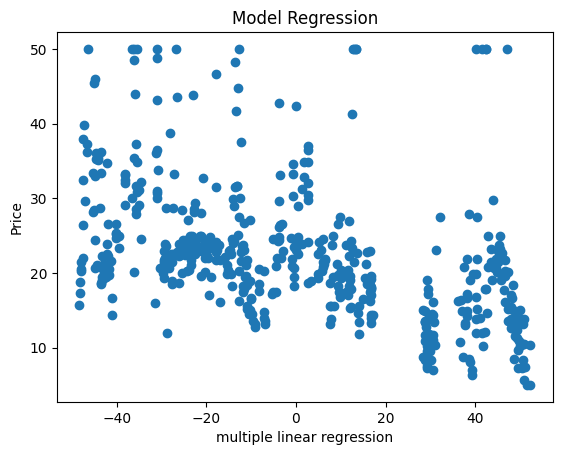

In [28]:
#모델 Scatter하기 TSNE이용.
plt.title("Model Regression")
plt.xlabel("multiple linear regression")
plt.ylabel("Price")
plt.scatter(X_tsne, Y, cmap='viridis')
plt.show()

In [22]:
#linear regression model
model = Sequential()
model.add(Dense(30,input_dim = 13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')
model.fit(X_train, Y_train, epochs = 200, batch_size = 10)

#예측값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()

for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제 가격: {:.3f}, 예상 가격 : {:.3f}".format(label,prediction))

Epoch 1/200


c:\Users\ksmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18066.0117   
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1066.9097
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 403.7925
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 290.9734
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 208.1951
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 151.9354
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116.8538
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 97.6863
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 86.3376
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 79.1134
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 74.9580
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72.4531  
Epoch 13/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.7850  
Epoch 14/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69.3998  
Epoch 15/200
41/41 ━━━━━━━━━━━━